05/11/15

**Jorge Vera Moreno**

## Introduction

In this notebook, we will plot experimental data from a simulation of how ions move through amorphous glass structures, find a least square fit line and calculate the diffusion coefficient for this experiment

To start, we need to import **NumPy**, and _PyPlot_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

It is also important to tell **IPython** to put the plots in a notebook, instead of a separate window

In [2]:
%matplotlib inline 

## Importing data

We will load our files with the experimental data in **IPython**. We set as parameters the names of our files, and that data points are delimited by commas in our case

In [3]:
data1 = np.genfromtxt ('Session5data.csv', delimiter=",")

Now that we have loaded our data into **IPython**, we specifiy which columns represent what data:

In [4]:
x1 = data1[:,0] #Column 0 of file 1 is X axis of first graph
y1 = data1[:,1] #Column 1 of file 1 is Y axis of first graph

## Plotting data and finding least square fit

Now that our data is loaded, we can plot it to see what it looks like:

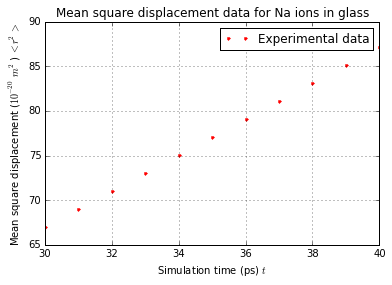

In [5]:
plt.plot(x1,y1,'r.',label="Experimental data") #Plot data from NaCl with green continuous lines
plt.xlabel(r'Simulation time (ps) $t$ ')
plt.ylabel('Mean square displacement ($10^{-20}$ $m^2$) $<r^2>$')
plt.title('Mean square displacement data for Na ions in glass')
plt.legend(loc="best")
plt.grid(True)

From the plot above, we can see that $ t $ and $ <r^2> $ follow a linear relation. We will now calculate a least square fit line for our data.

For the gradient of our line, we use the following expression which can be derived from the least squares method:

$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$

For the intercept, we use this one:

$$ c = \bar{y} - m \bar{x} $$

We now implement this in our code:

In [6]:
X=np.mean(x1) #Mean of experimental t
Y=np.mean(y1) #Mean of experimental <r^2>
s1=x1-X #Set of t values minus the mean
s2=y1-Y #Set of <r^2> values minus the mean
sp=sum(s1*s2) #Sum of the product of the previous two quantities
ls=sum(s1*s1) #Sum of the square of the set of t values minus the mean
m=sp/ls #The value for the gradient
b=Y-m*X #Value for the intercept
print "The slope is equal to:",m,"m^2 ps^-1 and the intercept is equal to:",b,"m^2"

The slope is equal to: 2.016210756 m^2 ps^-1 and the intercept is equal to: 6.50709513545 m^2


We now have enough data to plot our trend line, with proper significant figures:

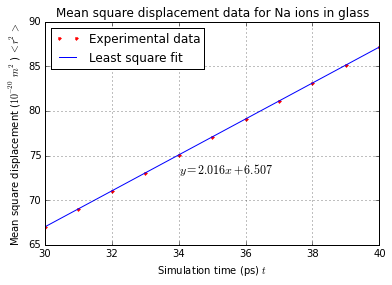

In [7]:
y2 = m*x1+b #Trend line values
plt.plot(x1,y1,'r.',label="Experimental data") #Plot experimental data
plt.plot(x1,y2,'b',label="Least square fit") #Plot trend line
plt.xlabel(r'Simulation time (ps) $t$ ')
plt.ylabel('Mean square displacement ($10^{-20}$ $m^2$) $<r^2>$')
plt.title('Mean square displacement data for Na ions in glass')
plt.legend(loc="best") #Plot legend in best location possible
plt.text(34, 73, "$y = {0:0.3f}x + {1:0.3f}$".format(m,b), fontsize=12) #Print the equation
plt.grid(True)

## Finding errors

We will now take a look at the difference between our experimental data and our trend line points; our errors. We can calculate them using the following formulae:

$$ \Delta m \approx  \sqrt{\frac{1}{D}\frac{\sum_{}^{} d_i^2}{n-2}}$$

As well as:

$$ \Delta c \approx  \sqrt{(\frac{1}{n}+\frac{\bar{x}^2}{D})\frac{\sum_{}^{} d_i^2}{n-2}}$$

Where:

$$ d_i=y_i-mx_i-c$$

and:

$$D= \sum_{}^{} (x-\bar{x})^2$$

We implement that in our code:

In [8]:
di=y1-m*x1-b #Experimental <r^2> minus our trend line gradient times experimental t minus the trendline intercept
SSdi=sum(di**2) #Sum of the previous data set with its elements squared
n=len(x1) #Number of data points taken
deltam=np.sqrt((1/ls)*(SSdi/(n-2))) #Mathematical definitions from above
deltab=np.sqrt(((1.0/n)+((X**2)/ls))*(SSdi/(n-2)))
print "The error in slope is equal to:",deltam,"m^2 ps^-1 and the error in intercept is equal to:",deltab,"m^2"

The error in slope is equal to: 0.00105026603643 m^2 ps^-1 and the error in intercept is equal to: 0.0369090443237 m^2


We can now include this information in our graph, and save it:

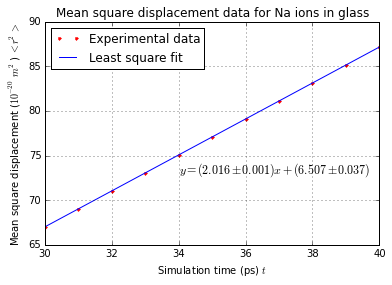

In [9]:
y2 = m*x1+b
plt.plot(x1,y1,'r.',label="Experimental data") #Plot data from NaCl with green continuous lines
plt.plot(x1,y2,'b',label="Least square fit") #Plot data from NaCl with green continuous lines
plt.xlabel(r'Simulation time (ps) $t$ ')
plt.ylabel('Mean square displacement ($10^{-20}$ $m^2$) $<r^2>$')
plt.title('Mean square displacement data for Na ions in glass')
plt.legend(loc="best")
plt.text(34, 73, "$y = ({0:0.3f} \pm {2:0.3f}) x + ({1:0.3f} \pm {3:0.3f})$".format(m,b,deltam,deltab), fontsize=12)
plt.grid(True)
plt.savefig('FinalPlot.png',dpi=1000)

## Finding the diffusion coefficient

Einstein showed that the mean square displacement is directly proportional to the elapsed time:

$$ <r^2>=6Dt $$

where $D$ is the diffusion coefficient.

We can, therefore, find the diffusion coefficient for our experimental data:

$$ D=\frac{m}{6}$$

In [10]:
D='%.4f'%(m/6) #Significant figures
deltaD='%.4f'%(deltam/6)
print "D =",D,"+/-",deltaD,"m^2 ps^-1"

D = 0.3360 +/- 0.0002 m^2 ps^-1
